# Data Ted
## An Analysis of the provided Ted Talks dataset
---
#### Matano Francesco S5253162
#### Vassallo Edoardo S4965918 

## Introduction

We gaming boys


## Imports


In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import sklearn

In [66]:

daTed = pd.read_csv("data_ted.csv") # data_ted.csv")

In [67]:
daTed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


> ## 0. Objectives
>> ###  ????? (ancora da definire)

## 1. Spring Cleaning
+ Debby Millman 2020 June correct date
+ Innovations in sleep 2020 July
+ Substitute Nan author with Ted (1 row)

In [68]:
i = daTed['author'].isnull()
daTed['author'] = np.where(daTed['author'].isnull() == True, 'Ted',  daTed['author'])
for x in range(len(i)):
    if (i[x] == True):
        print(daTed[i])


                   title author           date  views  likes  \
3039  Year In Ideas 2015    Ted  December 2015    532     15   

                                          link  
3039  https://ted.com/talks/year_in_ideas_2015  


In [69]:
daTed.loc[(daTed['author'] == 'Debbie Millman') & (daTed['date'] == 'January 1970'), 'date'] = 'June 2020'
daTed.loc[(daTed['title'] == 'Innovations in sleep') & (daTed['date'] == 'January 1970'), 'date'] = 'July 2020'
daTed["date"] = pd.to_datetime(daTed['date'], format='%B %Y')
daTed.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


## 2.  Looking at the data

In [70]:
def print_stats_field(df, field):
    print("---------------------------------------")
    print("Statics statics data of field: ", field)
    print("---------------------------------------")
    print("mean:   ",  df[field].mean()  )
    print("std:    ",  df[field].std()   ) 
    print("var:    ",  df[field].var()   )
    print('mode:   ',  df[field].mode()[0]  )
    print('median: ',  df[field].median())
    print("---------------------------------------")

print_stats_field(daTed, 'views')
print_stats_field(daTed, 'likes')
    

---------------------------------------
Statics statics data of field:  views
---------------------------------------
mean:    2061575.9579044117
std:     3567097.765115676
var:     12724186465893.252
mode:    1300000
median:  1300000.0
---------------------------------------
---------------------------------------
Statics statics data of field:  likes
---------------------------------------
mean:    62607.616727941175
std:     107646.76946116687
var:     11587826975.425608
mode:    39000
median:  40500.0
---------------------------------------


<Axes: xlabel='views', ylabel='likes'>

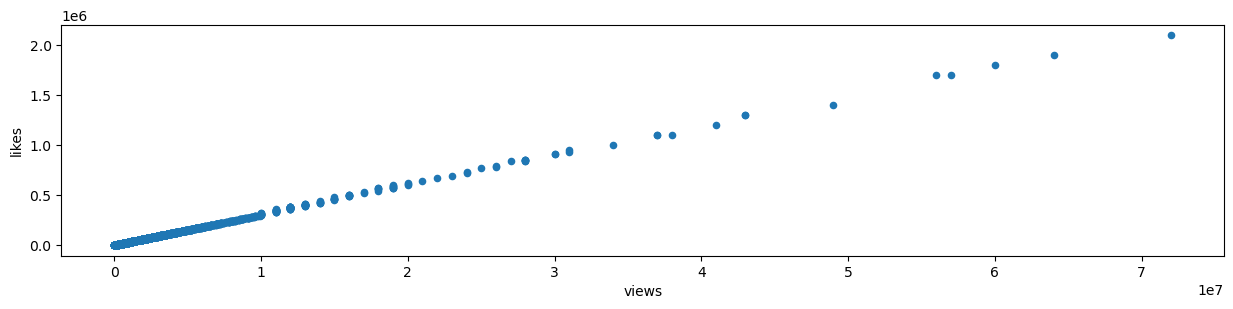

In [71]:
daTed.plot.scatter("views", "likes", figsize=(15, 3)) 

<Axes: title={'center': 'Numero di video realizzati ogni anno'}, xlabel='anno di pubblicazione', ylabel='numero di video'>

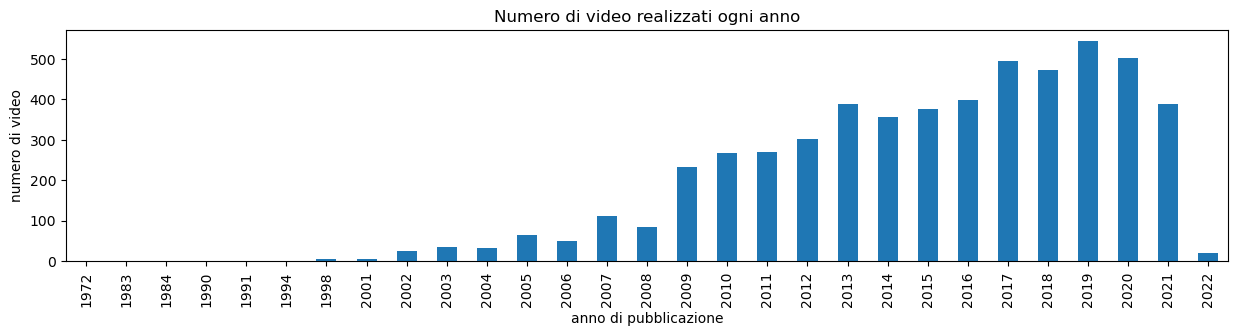

In [76]:
daTed.groupby(daTed.date.dt.year)['title'].count().plot(kind='bar', figsize=(15, 3), ylabel="numero di video", xlabel="anno di pubblicazione", title="Numero di video realizzati ogni anno")

<Axes: title={'center': 'Numero di visualizzazioni medie per i video di ogni anno'}, xlabel='anno di pubblicazione', ylabel='visualizzazioni medie'>

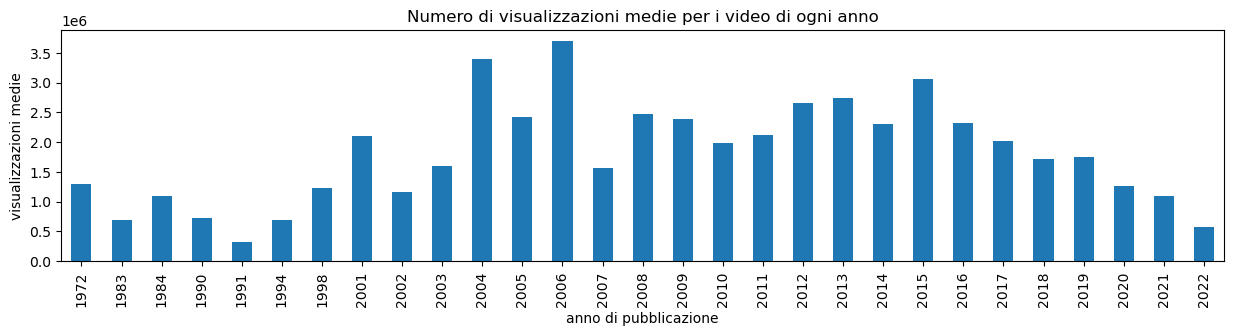

In [73]:
daTed.groupby(daTed.date.dt.year)['views'].mean().plot(kind='bar', figsize=(15, 3), ylabel="visualizzazioni medie", xlabel="anno di pubblicazione", title="Numero di visualizzazioni medie per i video di ogni anno")

<Axes: title={'center': 'Numero di like medio per i video di ogni anno'}, xlabel='anno di pubblicazione', ylabel='Numero like medio'>

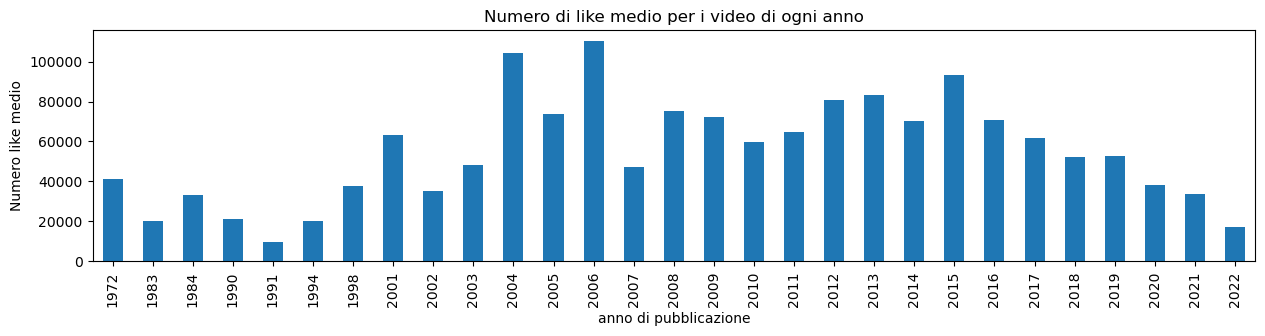

In [74]:
daTed.groupby(daTed.date.dt.year)['likes'].mean().plot(kind='bar', figsize=(15, 3), ylabel="Numero like medio", xlabel="anno di pubblicazione", title="Numero di like medio per i video di ogni anno")

## 3. Test Statistico

## 4. Metodo Predittivo


## 5. Clustering